<a href="https://colab.research.google.com/github/ShauryaDusht/machine-learning-basics/blob/main/LAB10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning - Gymnasium library**

## **FrozenLake-v1**
```
All the scripts can only be run on a local machine
Colab dont support running these Gymnasium library with enviormnment
Though we can make model but can see the enviornment
```

## Brief about


**FrozenLake-v1 (from Gymnasium)**

**State Space:**
Discrete states representing each tile on the lake grid (e.g., 4x4 = 16 states).

**Action Space:**
Discrete(4) — Move: `Left`, `Down`, `Right`, `Up`.

**Transition Dynamics**
* Deterministic if is_slippery=False: Agent moves exactly as commanded.
* Stochastic if is_slippery=True: Agent may slip to unintended directions.

**Reward Function**
*   +1 for reaching the goal.
*   0 for all other steps (including falling into holes).

**Episode Termination Conditions**
*   Reaching the goal tile.
*   Falling into a hole.

**Potential Real-World Applications**
*   Navigation in uncertain terrains.
*   Basic modeling for mobile robots in dangerous environments (e.g., ice fields or minefields).
*   Path planning with obstacles and slippery dynamics.


## **Installing Libraries and dependencies**

In [ ]:
%%capture
!pip install swig
!pip install gymnasium[all]

In [ ]:
!pip install gymnasium['FrozenLake-v1']

In [ ]:
gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v3', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Walker2d-v5', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5

## **Training**
```
This script is for fast execution
Q-model is made from this at earliest which can be used to run the RL trained agent
The accuracy vs episode is plotted
```

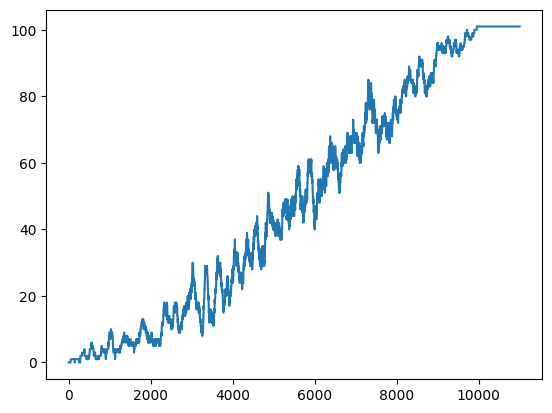

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def run(num_episodes, render=False):
    env = gym.make('FrozenLake-v1', map_name='4x4', is_slippery=False, render_mode='human' if render else None)

    q = np.zeros([env.observation_space.n, env.action_space.n])
    learning_rate = 0.9
    discount_factor = 0.9
    epsilon = 1
    epsilon_decay_rate = 0.0001

    rewards_per_episode = np.zeros(num_episodes)

    for i in range(num_episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False

        while not terminated and not truncated:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, info = env.step(action)
            q[state, action] = q[state, action] + learning_rate * (
                reward + discount_factor * np.max(q[new_state, :]) - q[state, action]
            )
            state = new_state
            if render:
                env.render()
        epsilon = max(0, epsilon - epsilon_decay_rate)
        if epsilon == 0:
            learning_rate = 0.00001
        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(num_episodes)
    for t in range(num_episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.savefig('frozen_lake.png')

    with open('frozen_lake.pkl', 'wb') as f:
        pickle.dump(q, f)

if __name__ == '__main__':
    run(11000, render=False)

## **Loss chart training**
```
In this script we can see the accuracy vs episode plot
The plot is slow but fast enough to be viewd in a couple of minutes
No enviornment is opened during this script
```

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def run(num_episodes, render=False):
    env = gym.make('FrozenLake-v1', map_name='4x4', is_slippery=False, render_mode='human' if render else None)

    q = np.zeros([env.observation_space.n, env.action_space.n])
    learning_rate = 0.9
    discount_factor = 0.9
    epsilon = 1
    epsilon_decay_rate = 0.001

    rewards_per_episode = np.zeros(num_episodes)

    # Set up the plot for real-time feedback
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()
    ax.set_xlabel('Episode')
    ax.set_ylabel('Sum of Rewards (last 100 episodes)')
    ax.set_title('Training Progress')
    line, = ax.plot([], [], 'r-')  # Initialize an empty line plot
    ax.set_xlim(0, num_episodes)
    ax.set_ylim(0, 100)  # Set the y-limit based on the reward range

    for i in range(num_episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False
        total_reward = 0

        while not terminated and not truncated:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward

            q[state, action] = q[state, action] + learning_rate * (
                reward + discount_factor * np.max(q[new_state, :]) - q[state, action]
            )
            state = new_state

            if render:
                env.render()

        rewards_per_episode[i] = total_reward
        epsilon = max(0, epsilon - epsilon_decay_rate)

        if epsilon == 0:
            learning_rate = 0.00001

        if (i+1) % 1000 == 0:  # Print progress every 1000 episodes
            print(f"Episode {i+1}/{num_episodes}, Epsilon: {epsilon:.4f}, Total Reward: {total_reward}")

        # Update plot with the sum of rewards over the last 100 episodes
        sum_rewards = np.zeros(i + 1)
        for t in range(i + 1):
            sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])

        line.set_ydata(sum_rewards)
        line.set_xdata(np.arange(i + 1))
        plt.pause(0.01)  # Pause to update the plot

    plt.ioff()  # Turn off interactive mode
    plt.show()

    env.close()

    # Save the Q-table to a file
    with open('frozen_lake.pkl', 'wb') as f:
        pickle.dump(q, f)

if __name__ == '__main__':
    run(11000, render=False)

## **View Game**
```
This script is used to see the environment and actions performed
It takes a lot of time to train so we use above methods for training
```

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def run(num_episodes, render=False):
    env = gym.make('FrozenLake-v1', map_name='4x4', is_slippery=False, render_mode='human' if render else None)

    q = np.zeros([env.observation_space.n, env.action_space.n])
    learning_rate = 0.9
    discount_factor = 0.9
    epsilon = 1
    epsilon_decay_rate = 0.1

    rewards_per_episode = np.zeros(num_episodes)

    for i in range(num_episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False
        total_reward = 0

        while not terminated and not truncated:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state, :])

            new_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward

            q[state, action] = q[state, action] + learning_rate * (
                reward + discount_factor * np.max(q[new_state, :]) - q[state, action]
            )
            state = new_state

            if render:
                env.render()

        rewards_per_episode[i] = total_reward
        epsilon = max(0, epsilon - epsilon_decay_rate)

        if epsilon == 0:
            learning_rate = 0.00001

        if (i + 1) % 1000 == 0:
            print(f"Episode {i+1}/{num_episodes}, Epsilon: {epsilon:.4f}, Total Reward: {total_reward}")

    env.close()

    with open('frozen_lake.pkl', 'wb') as f:
        pickle.dump(q, f)

if __name__ == '__main__':
    run(11000, render=True)


## **Viewing Trained Model**
```
This script is used to run the trained agent in the environment
It can be run after completion of any of the above 3 scripts as they generate Q-table values.
```

In [ ]:
import pickle

def run_simulation(model_path, render=True):
    with open(model_path, 'rb') as f:
        q = pickle.load(f)

    env = gym.make('FrozenLake-v1', map_name='4x4', is_slippery=False, render_mode='human' if render else None)

    state = env.reset()[0]
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action = np.argmax(q[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        state = new_state

        if render:
            env.render()

    env.close()

if __name__ == '__main__':
    run_simulation('frozen_lake.pkl', render=True)